In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming your CSV file is named 'data.csv'
df = pd.read_csv('UE1_noFRER_CSV.csv')

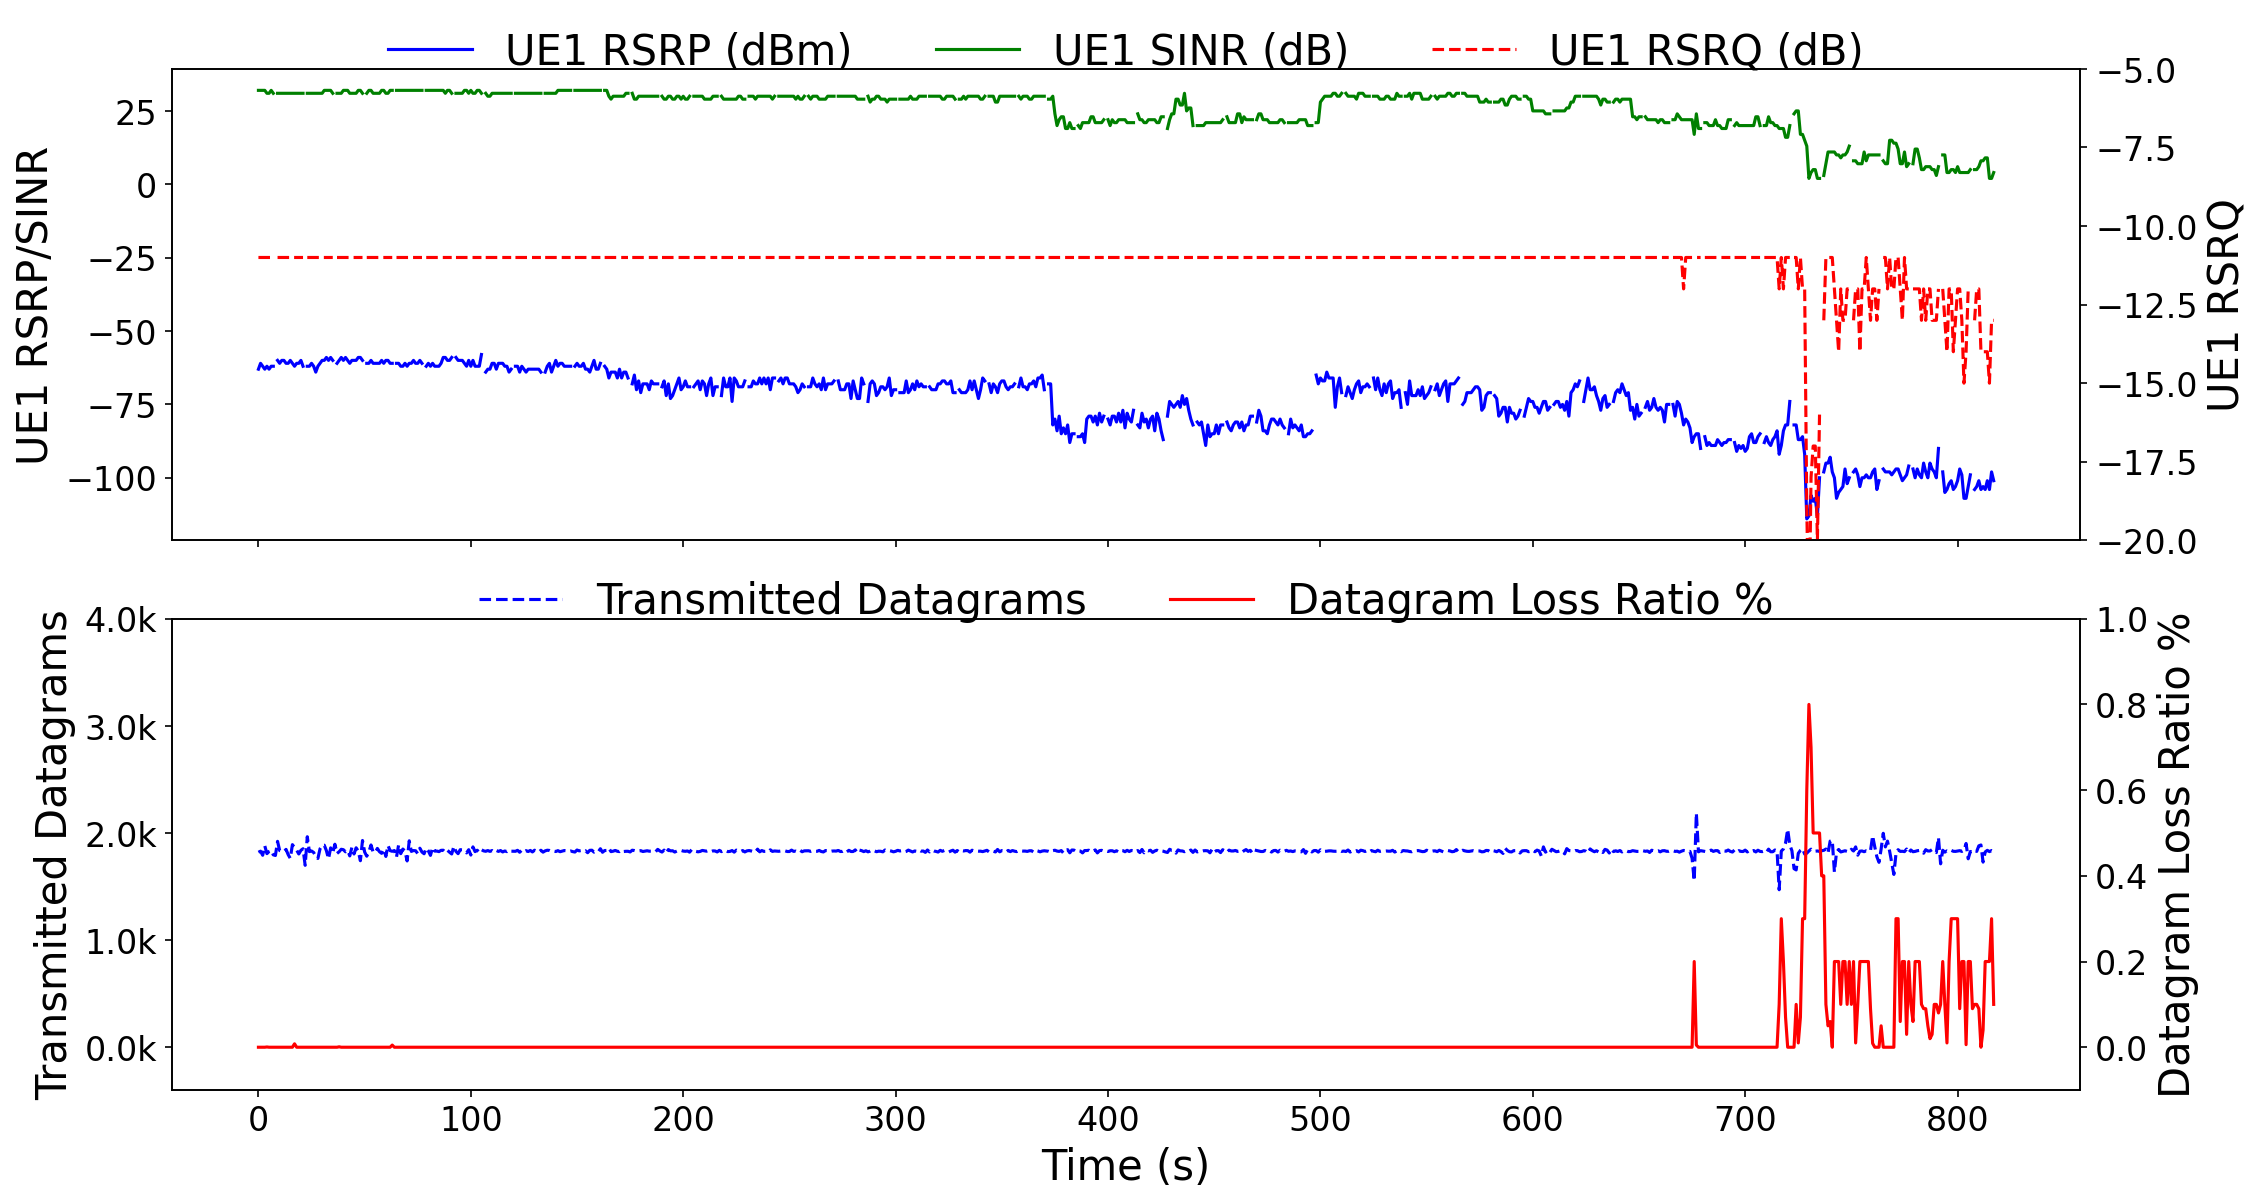

In [6]:
# Reset index to make sure we use integer indices for x-axis
df.reset_index(drop=True, inplace=True)

# Function to format the tick labels in thousands
def thousands_formatter(x, pos):
    return f'{x / 1000}k'

# Function to add legend below each subplot
def add_legend(ax, ax2):
    # Collect handles and labels for both axes
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    # Place the combined legend in the middle below the subplot
    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=3, frameon=False, fontsize=20)



# Create figure and axes
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True, dpi=150)

# Plotting with index values
# UE1 RSRP and SINR with RSRQ on the secondary y-axis
ax1 = axs[0]
ax1.plot(df.index, df['UE1 RSRP'], label='UE1 RSRP (dBm)', color='blue')
ax1.plot(df.index, df['UE1 SINR'], label='UE1 SINR (dB)', color='green')
ax1.set_ylabel('UE1 RSRP/SINR', fontsize=20)

# Create secondary y-axis for RSRQ
ax1_rsrq = ax1.twinx()
ax1_rsrq.plot(df.index, df['UE1 RSRQ'], label='UE1 RSRQ (dB)', color='red', linestyle='--')
ax1_rsrq.set_ylabel('UE1 RSRQ', fontsize=20)
ax1_rsrq.set_ylim(-20,-5)
add_legend(ax1, ax1_rsrq)


# UE1 Total Datagrams and Datagrams Loss Ratio with switched axes
ax2 = axs[1]
# Plot Total Datagrams on the primary y-axis
ax2.plot(df.index, df['UE1 Total Datagrams'], label='Transmitted Datagrams', color='blue', linestyle='--')
ax2.set_ylabel('Transmitted Datagrams', fontsize=20)
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.set_ylim(-400, 4000)  # Adjust as necessary


# Create secondary y-axis for Datagrams Loss Ratio
ax2_2 = ax2.twinx()
ax2_2.plot(df.index, df['UE1 Datagrams Loss Ratio'], label='Datagram Loss Ratio %', color='red')
ax2_2.set_ylabel('Datagram Loss Ratio %', fontsize=20)
ax2.set_xlabel('Time (s)',fontsize=20)
ax2_2.set_ylim(-0.1,1)
add_legend(ax2, ax2_2)




# Set the desired font size for tick labels
font_size = 16  # Example font size, adjust as needed

# Increase font size of the numbers on the y and x axes for all primary subplots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Explicitly set font size for secondary y-axes created with twinx()
for ax_twin in [ax1_rsrq, ax2_2]:
    ax_twin.tick_params(axis='y', which='major', labelsize=font_size)



#plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the overall layout
plt.subplots_adjust(hspace=0.2)  # Adjust space between subplots if necessary



# Formatting
plt.subplots_adjust(hspace=0.3, bottom=0.2)
plt.tight_layout()

plt.savefig("noFRERscenario.pdf")
plt.show()
